# SPR 

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.optimize import least_squares,minimize,fmin

### Equations

Dimensions and constants
* Lx=0.24 cm
* Ly=0.005 cm
* Lz=0.05 cm
* D=3e-7 cm^2/s
* $\Gamma(2/3)$=1.35412
* $\Gamma(4/3)$=0.89298

Flow rate=  $ 0.5 \mu L/s$, therefore $v_z=0.5x0.001$. Speed in the centre is defined
$$v=1.5\frac{ v_z}{Ly Lz}$$

$$\alpha=(4/3)\Gamma(4/3)(2/3)\Gamma(2/3)$$
$$k_m=\frac{1}{\Gamma(4/3)}\left(\frac{3 v_{max}D^2}{2 L_y L_x}\right)^{1/3}$$
The final equations are:
$$\frac{d\;B(t)}{d\;t}=C_Tk_a^e\left(R_T-B(t)\right)-k_d^eB(t)$$

$$k_a^e=\frac{k_a}{1+\frac{k_a\left(R_T-B(t)\right)}{\alpha k_m}}$$
$$k_d^e=\frac{k_d}{1+\frac{k_a\left(R_T-B(t)\right)}{\alpha k_m}}$$

In case association phase

$$\frac{d\;B(t)}{d\;t}=C_Tk_a^e\left(R_T-B(t)\right)-k_d^eB(t)$$

In case of dissaciation phase

$$\frac{d\;B(t)}{d\;t}=-k_d^eB(t)$$

In [109]:
def asoc(t,B,c0,ka,kd,RT):
    Lx=0.24;
    Ly=0.005;
    vz=0.5*0.001;
    Lz=0.05
    v=(1.5)*vz/(Ly*Lz);
    D=3e-7;
    gamma23=1.35412
    gamma43=0.89298
    km=1.075/0.89298*((3*v*D*D)/(2*Ly*Lx))**(1/3);
    alpha=(4/3)*gamma43*(2/3)*gamma23
    kae=ka/(1+(ka*(RT-B)/(alpha*km)))
    kde=kd/(1+(ka*(RT-B)/(alpha*km)))
    a=kae*c0*(RT-B)-kde*B
    return a
def dis(t,B,c0,ka,kd,RT):
    Lx=0.24;
    Ly=0.005;
    vz=0.5*0.001;
    Lz=0.05
    v=(1.5)*vz/(Ly*Lz);
    D=3e-7;
    gamma23=1.35412
    gamma43=0.89298
    km=1.075/0.89298*((3*v*D*D)/(2*Ly*Lx))**(1/3);
    alpha=(4/3)*gamma43*(2/3)*gamma23
    kae=ka/(1+ka*(RT-B)/(alpha*km))
    kde=kd/(1+ka*(RT-B)/(alpha*km))
    a=-np.abs(kde*B)
    return a

In [110]:
def func (par,cx,t_eval1,t_eval2,Manalyt):
    ka=par[0];
    kd=par[1];
    RU=par[2];
    B=[];
    B1=[];
    for ii in range(5):
        sol = solve_ivp(asoc, [0, 120], [0],method="RK45", t_eval=t_eval1,args=(cx[ii],ka,kd,RT), atol = 1e-8)
        T=sol.t
        S=sol.y
        B.append(S[0,:]*150000*0.01/1e-3)
        sol1 = solve_ivp(dis, [120, 650], [S[0,119]],method="RK45", t_eval=t_eval2,args=(cx[ii],ka,kd,RT), atol = 1e-8)
        T1=sol1.t
        S1=sol1.y
        B1.append(S1[0,:]*150000*0.01/1e-3)
    return B ,B1

In [111]:
dt=pd.read_csv('/home/dell/Desktop/dell/a_5e-8_75e-11_.dat',sep=" ")  
data=np.array(dt)
dd=data;

Example:
* kaa= 1e5 1/(M s)
* kdd=1e-3 1/s
* ru=500 pg/mm^2
* cxx=np.array([18,37,75,150,300]); concetration in nM
* Mligand=40000 g/mol
* Manalyt=150000 g/mol
* t_eval1 = np.arange(0,120, 1); association phase 0 to 120s sampling 1s  
* t_eval2 = np.arange(121,650, 1); dissociantion phase 0 to 120s sampling 1s 

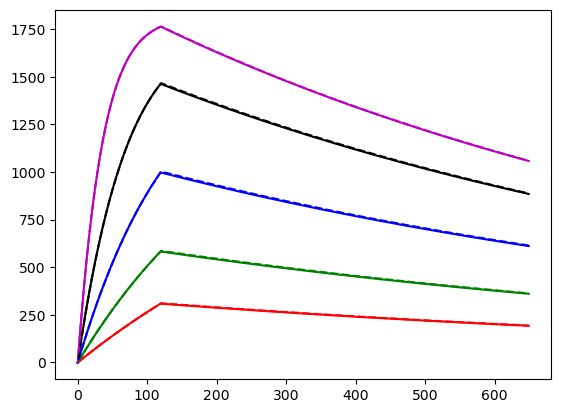

In [114]:
kaa=8e4
kdd=1e-3
ru=500;
cxx=np.array([18,37,75,150,300]);
Mligand=40000
Manalyt=150000;
t_eval1 = np.arange(0,120, 1);
t_eval2 = np.arange(121,650, 1);
#----------------------------------------------------------------
# Do not edit under line
ka=kaa/1e6;
kd=kdd;
RU=ru;
cx=0.001*cxx
RT=(RU/Mligand)*((1e-3)/0.01);
par=[ka,kd,RT]
t_total=np.concatenate((t_eval1,t_eval2))
spy=func (par,cx,t_eval1,t_eval2,Manalyt)

sim1=spy[1]
sim0=spy[0]
plt.figure(1)
plt.plot(t_total,np.concatenate((sim0[0],sim1[0])),'r')
plt.plot(t_total,np.concatenate((sim0[1],sim1[1])),'g')
plt.plot(t_total,np.concatenate((sim0[2],sim1[2])),'b')
plt.plot(t_total,np.concatenate((sim0[3],sim1[3])),'k')
plt.plot(t_total,np.concatenate((sim0[4],sim1[4])),'m')
plt.plot(dd[:,0],dd[:,6],'r--')
plt.plot(dd[:,0],dd[:,7],'g--')
plt.plot(dd[:,0],dd[:,8],'b--')
plt.plot(dd[:,0],dd[:,9],'k--')
plt.plot(dd[:,0],dd[:,10],'m--')
